In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# 读取模拟数据
df = pd.read_csv("全国285城市_数字基础设施与收入不平等_模拟数据.csv")
df.head()

,城市,年份,数字基础设施得分,人均GDP,教育资源指数,就业率,基尼系数,泰尔指数
0,城市_1,2010,54.34,54157.01,0.598,0.850,0.438,0.331
1,城市_1,2011,52.74,55059.11,0.612,0.832,0.436,0.330
2,城市_1,2012,50.04,88170.67,0.653,0.844,0.431,0.322
3,城市_1,2013,70.08,61231.79,0.624,0.858,0.430,0.327
4,城市_1,2014,71.29,88205.73,0.646,0.869,0.428,0.327


D:\jupyter notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\jupyter notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\jupyter notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\jupyter notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\jupyter notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

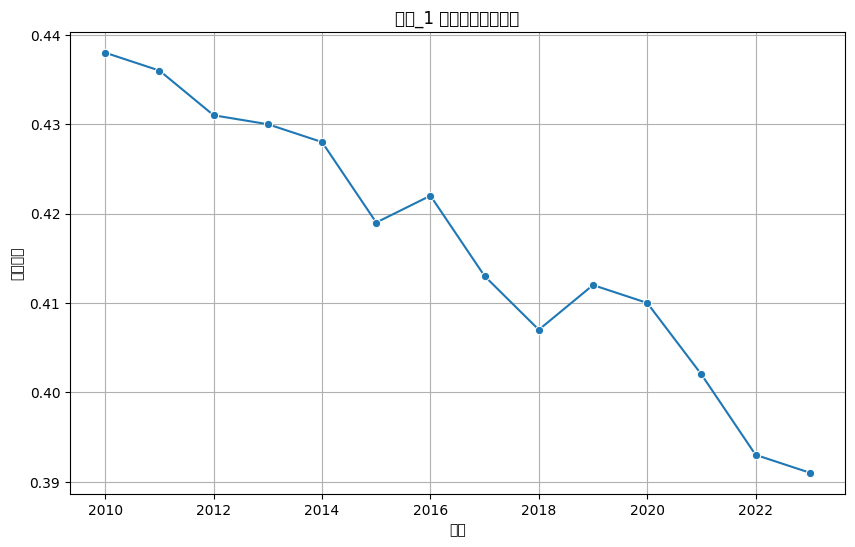

In [2]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df["城市"] == "城市_1"], x="年份", y="基尼系数", marker="o")
plt.title("城市_1 基尼系数时间趋势")
plt.xlabel("年份")
plt.ylabel("基尼系数")
plt.grid(True)
plt.show()

In [3]:
# 设置双重索引（城市，年份）
df_panel = df.set_index(["城市", "年份"])

# 衍生变量（如 log GDP）
df_panel["log_gdp"] = np.log(df_panel["人均GDP"])

In [4]:
# 构建模型：解释变量包括数字基础设施、人均GDP、教育资源指数、就业率
model = PanelOLS.from_formula(
    formula="基尼系数 ~ 1 + 数字基础设施得分 + log_gdp + 教育资源指数 + 就业率 + EntityEffects + TimeEffects",
    data=df_panel
)

# 拟合模型（对城市聚类调整标准误）
results = model.fit(cov_type="clustered", cluster_entity=True)
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   基尼系数   R-squared:                     9.273e-05
Estimator:                   PanelOLS   R-squared (Between):           5.817e-05
No. Observations:                3990   R-squared (Within):               0.0002
Date:                Mon, Apr 07 2025   R-squared (Overall):           9.111e-05
Time:                        08:56:59   Log-likelihood                  1.56e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.0855
Entities:                         285   P-value                           0.9869
Avg Obs:                       14.000   Distribution:                  F(4,3688)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):             0.0771
                            

D:\jupyter notebook\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
D:\jupyter notebook\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
D:\jupyter notebook\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
D:\jupyter notebook\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 30784 (\N{CJK UNIFIED IDEOGRAPH-7840}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
D:\jupyter notebook\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 35774 (\N{CJK UNIFIED IDEOGRAPH-8BBE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)


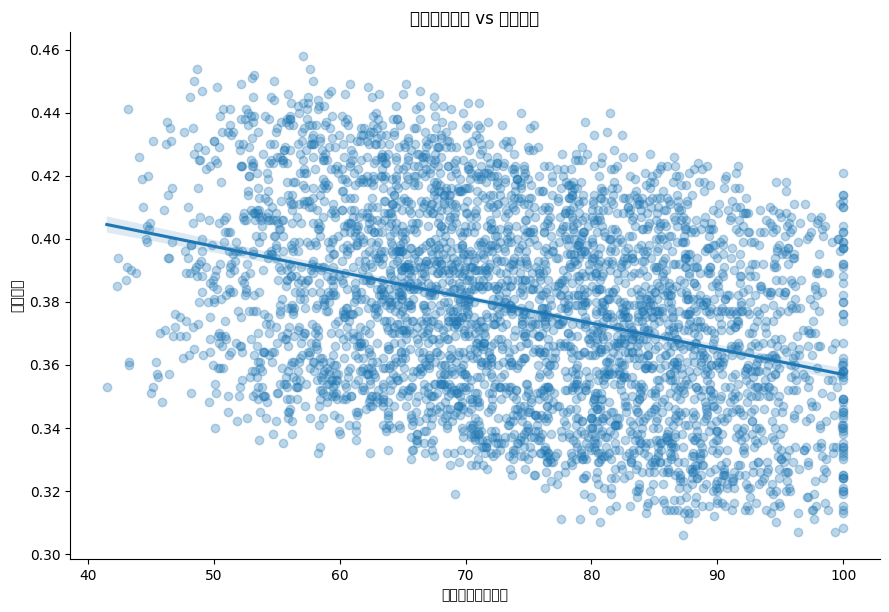

In [5]:
sns.lmplot(
    data=df, x="数字基础设施得分", y="基尼系数",
    aspect=1.5, height=6, scatter_kws={"alpha":0.3}
)
plt.title("数字基础设施 vs 基尼系数")
plt.show()

In [7]:
# 确保 log_gdp 存在于原始 DataFrame 中
df["log_gdp"] = np.log(df["人均GDP"])

In [8]:
df_panel = df.set_index(["城市", "年份"])

In [9]:
df_panel_did = df.set_index(["城市", "年份"])
df_panel_spatial = df.set_index(["城市", "年份"])